In [113]:
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
df = pd.read_excel('Brass Marquetry Database, May 2024.xlsx')

/Users/alexischastang/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


In [119]:
df

,Spectrum Name,Cr,Unnamed: 2,Unnamed: 3,Unnamed: 4,Mn,Unnamed: 6,Unnamed: 7,Unnamed: 8,Fe,...,Pb.1,PbM.1,Bi.1,nan.6,nan.7,nan.8,nan.9,nan.10,nan.11,Images
0,1680_French_Golecabinet_Nostellpriory_brassmar...,0.003989,±,0.015189,*,0.002810,±,0.006993,*,0.109482,...,0.201151,NaN,0.039314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1680_French_Golecabinet_Nostellpriory_brassmar...,-0.004349,±,0.013230,*,0.005664,±,0.007067,NaN,0.126103,...,0.204577,NaN,0.039374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1680_French_Golecabinet_Nostellpriory_drawerbr...,-0.003786,±,0.013360,*,0.006376,±,0.007085,NaN,0.151714,...,0.391394,NaN,0.039968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1670_French_GoleCandlestand_Knole_BM_Xrf1.csv,0.000964,±,0.014471,*,0.009549,±,0.007167,NaN,0.376552,...,0.216486,NaN,0.039099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1670_French_GoleCandlestand_Knole_BM_Xrf2.csv,-0.001332,±,0.013931,*,0.009071,±,0.007155,NaN,0.321156,...,0.215017,NaN,0.039150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,AlexDiCarcaci_InlayTable_BrassMarquetry_Top_Xr...,0.002902,±,0.014930,*,0.000061,±,0.006922,*,0.125806,...,0.215104,NaN,0.039985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
551,AlexDiCarcaci_InlayTable_BrassMarquetry_Top_Xr...,0.004694,±,0.015358,*,0.001860,±,0.006968,*,0.256979,...,0.216852,NaN,0.039921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
552,AlexDiCarcaci_InlayTable_BrassMarquetry_Top_Xr...,-0.001161,±,0.013971,*,0.002953,±,0.006997,*,0.298306,...,0.212782,NaN,0.040375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
553,AlexDiCarcaci_InlayTable_BrassMarquetry_Top_Xr...,0.011487,±,0.017009,NaN,0.021247,±,0.007475,NaN,1.259360,...,0.229463,NaN,0.041736,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
def split_dataframe_by_keywords(df, keywords):
    
    gole_filter = df.apply(lambda row: row.astype(str).str.contains('Gole', case=False).any(), axis=1)
    boulle_filter = df.apply(lambda row: row.astype(str).str.contains('Boulle', case=False).any(), axis=1)
    oppenordt_filter = df.apply(lambda row: row.astype(str).str.contains('Oppenordt', case=False).any(), axis=1)

    gole_filter = gole_filter & (df['Mean Date'] <= 1700)
    boulle_filter = boulle_filter & (df['Mean Date'] <= 1750)
    oppenordt_filter = oppenordt_filter & (df['Mean Date'] <= 1725)

    combined_filter = gole_filter | boulle_filter | oppenordt_filter
    other_df = df[~combined_filter]
    
    return gole_df, boulle_df, oppenordt_df, other_df

In [121]:
gole_df, boulle_df, oppenordt_df, other_df = split_dataframe_by_keywords(df, ['Gole', 'Boulle', 'Oppenordt'])

In [122]:
Ag = []
manufactured_years_Ag = []

for index, row in df.iterrows():
        Ag.append(row['Ag'])
        manufactured_years_Ag.append(row['Mean Date'])

In [123]:
data = {'Elemental Content':Ag,'Year of Manufacture':manufactured_years_Ag}

In [124]:
Silver_graph_df = pd.DataFrame(data)

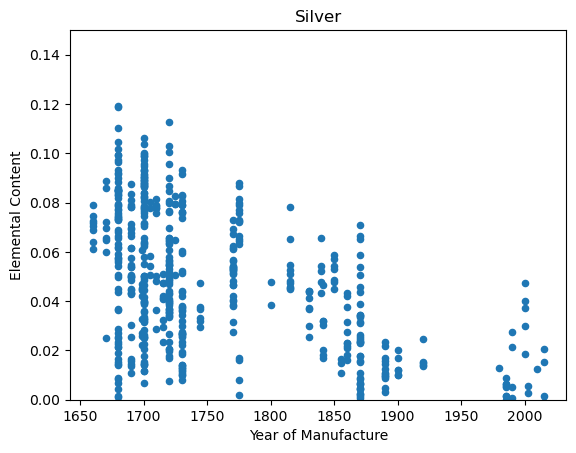

In [125]:
Silver_graph_df.plot.scatter('Year of Manufacture','Elemental Content',ylim=(0,0.15),title='Silver')
plt.savefig('HistoricalBrassSilver.png')

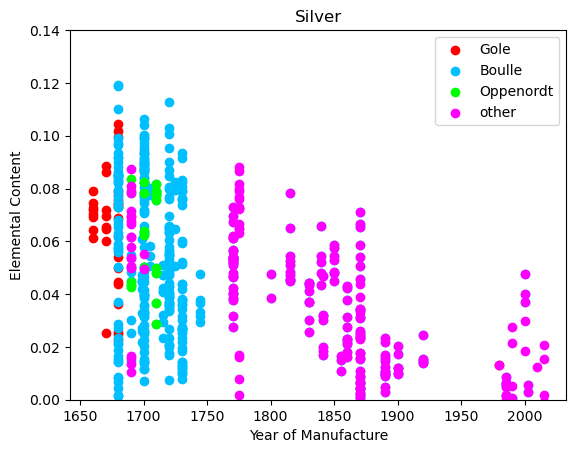

In [172]:
plt.scatter(gole_df['Mean Date'], gole_df['Ag'], color='red', label='Gole')
plt.scatter(boulle_df['Mean Date'], boulle_df['Ag'], color='deepskyblue', label='Boulle')
plt.scatter(oppenordt_df['Mean Date'], oppenordt_df['Ag'], color='lime', label='Oppenordt')
plt.scatter(other_df['Mean Date'], other_df['Ag'], color='magenta', label='other')
plt.title('Silver')
plt.xlabel('Year of Manufacture')
plt.ylabel('Elemental Content')
plt.ylim(0,0.14)
plt.legend()
plt.savefig('HistoricalBrassSilverArtistSeparation.png')
plt.show()

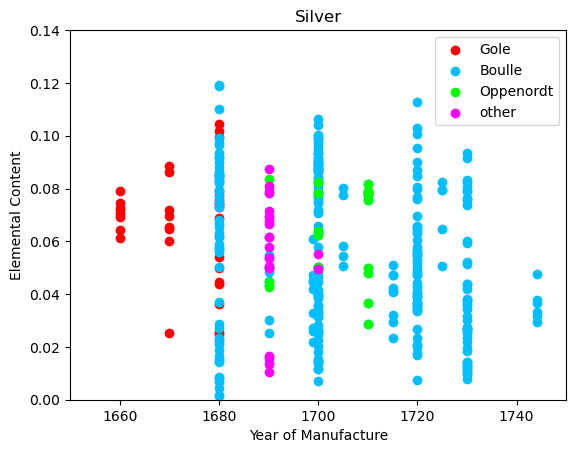

In [173]:
plt.scatter(gole_df['Mean Date'], gole_df['Ag'], color='red', label='Gole')
plt.scatter(boulle_df['Mean Date'], boulle_df['Ag'], color='deepskyblue', label='Boulle')
plt.scatter(oppenordt_df['Mean Date'], oppenordt_df['Ag'], color='lime', label='Oppenordt')
plt.scatter(other_df['Mean Date'], other_df['Ag'], color='magenta', label='other')
plt.title('Silver')
plt.xlabel('Year of Manufacture')
plt.ylabel('Elemental Content')
plt.ylim(0,0.14)
plt.xlim(1650,1750)
plt.legend()
plt.savefig('HistoricalBrassSilverArtistFocus.png')
plt.show()

In [127]:
Fe = []
manufactured_years_Fe = []

for index, row in df.iterrows():
        Fe.append(row['Fe'])
        manufactured_years_Fe.append(row['Mean Date'])

In [128]:
data1 = {'Elemental Content':Fe,'Year of Manufacture':manufactured_years_Fe}

In [129]:
Iron_graph_df = pd.DataFrame(data1)

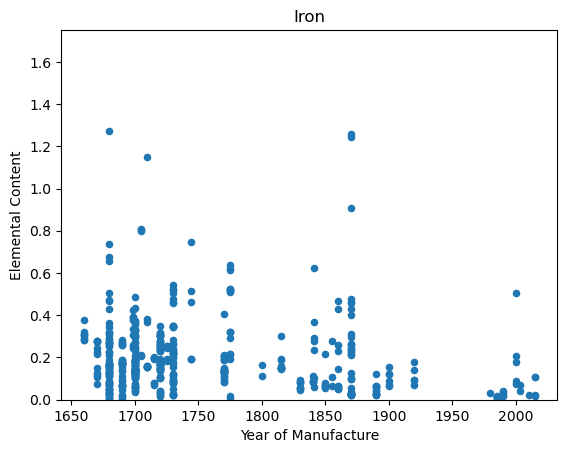

In [130]:
Iron_graph_df.plot.scatter('Year of Manufacture','Elemental Content',ylim=(0,1.75),title='Iron')
plt.savefig('HistoricalBrassIron.png')

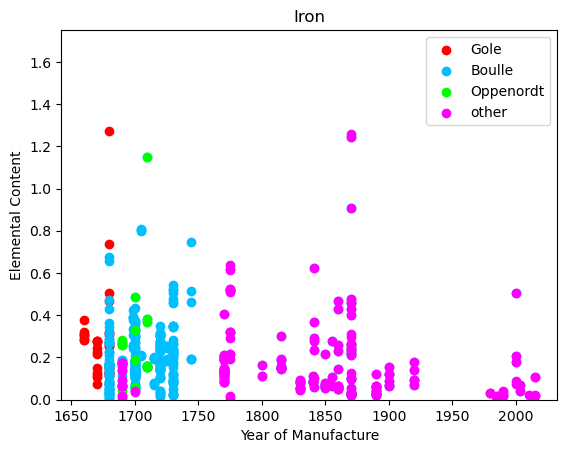

In [174]:
plt.scatter(gole_df['Mean Date'], gole_df['Fe'], color='red', label='Gole')
plt.scatter(boulle_df['Mean Date'], boulle_df['Fe'], color='deepskyblue', label='Boulle')
plt.scatter(oppenordt_df['Mean Date'], oppenordt_df['Fe'], color='lime', label='Oppenordt')
plt.scatter(other_df['Mean Date'], other_df['Fe'], color='magenta', label='other')
plt.title('Iron')
plt.xlabel('Year of Manufacture')
plt.ylabel('Elemental Content')
plt.ylim(0,1.75)
plt.legend()
plt.savefig('HistoricalBrassIronArtistSeparation.png')
plt.show()

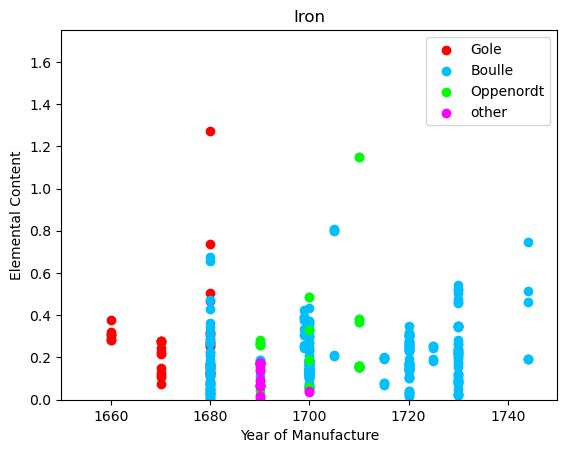

In [175]:
plt.scatter(gole_df['Mean Date'], gole_df['Fe'], color='red', label='Gole')
plt.scatter(boulle_df['Mean Date'], boulle_df['Fe'], color='deepskyblue', label='Boulle')
plt.scatter(oppenordt_df['Mean Date'], oppenordt_df['Fe'], color='lime', label='Oppenordt')
plt.scatter(other_df['Mean Date'], other_df['Fe'], color='magenta', label='other')
plt.title('Iron')
plt.xlabel('Year of Manufacture')
plt.ylabel('Elemental Content')
plt.ylim(0,1.75)
plt.xlim(1650,1750)
plt.legend()
plt.savefig('HistoricalBrassIronArtistFocus.png')
plt.show()

In [132]:
As = []
manufactured_years_As = []

for index, row in df.iterrows():
        As.append(row['AsKb'])
        manufactured_years_As.append(row['Mean Date'])

In [133]:
data2 = {'Elemental Content':As,'Year of Manufacture':manufactured_years_As}

In [134]:
As_graph_df = pd.DataFrame(data2)

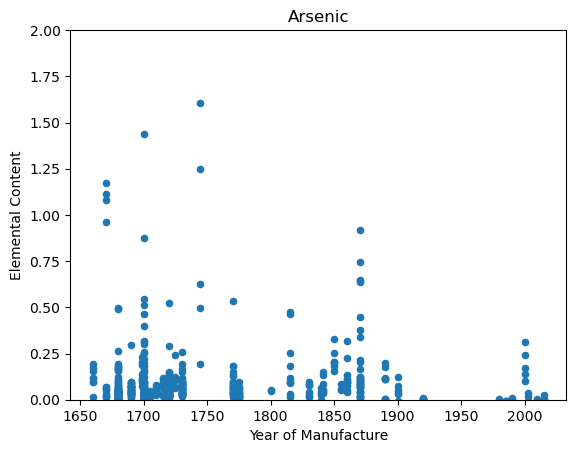

In [135]:
As_graph_df.plot.scatter('Year of Manufacture','Elemental Content',title='Arsenic',ylim=(0,2))
plt.savefig('HistoricalBrassArsenic.png')

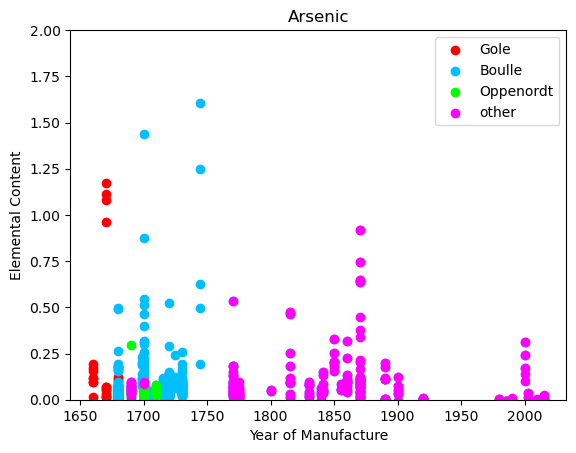

In [176]:
plt.scatter(gole_df['Mean Date'], gole_df['AsKb'], color='red', label='Gole')
plt.scatter(boulle_df['Mean Date'], boulle_df['AsKb'], color='deepskyblue', label='Boulle')
plt.scatter(oppenordt_df['Mean Date'], oppenordt_df['AsKb'], color='lime', label='Oppenordt')
plt.scatter(other_df['Mean Date'], other_df['AsKb'], color='magenta', label='other')
plt.title('Arsenic')
plt.xlabel('Year of Manufacture')
plt.ylabel('Elemental Content')
plt.ylim(0,2)
plt.legend()
plt.savefig('HistoricalBrassArsenicArtistSeparation.png')
plt.show()

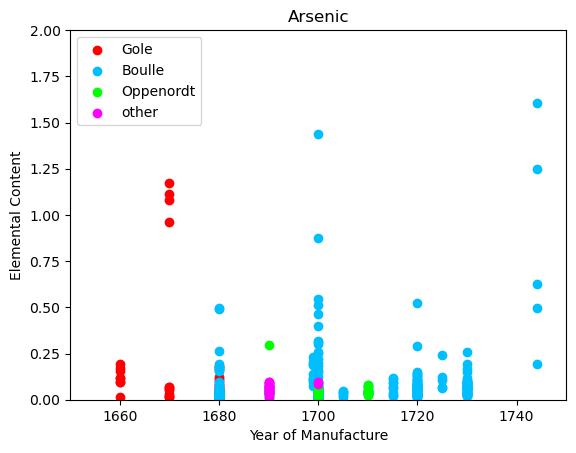

In [171]:
plt.scatter(gole_df['Mean Date'], gole_df['AsKb'], color='red', label='Gole')
plt.scatter(boulle_df['Mean Date'], boulle_df['AsKb'], color='deepskyblue', label='Boulle')
plt.scatter(oppenordt_df['Mean Date'], oppenordt_df['AsKb'], color='lime', label='Oppenordt')
plt.scatter(other_df['Mean Date'], other_df['AsKb'], color='magenta', label='other')
plt.title('Arsenic')
plt.xlabel('Year of Manufacture')
plt.ylabel('Elemental Content')
plt.ylim(0,2)
plt.xlim(1650,1750)
plt.legend()
plt.savefig('HistoricalBrassArsenicArtistFocus.png')
plt.show()

In [137]:
Zn = []
manufactured_years_Zn = []

for index, row in df.iterrows():
        Zn.append(row['Zn'])
        manufactured_years_Zn.append(row['Mean Date'])

In [138]:
data3 = {'Elemental Content':Zn,'Year of Manufacture':manufactured_years_Zn}

In [139]:
Zn_graph_df = pd.DataFrame(data3)

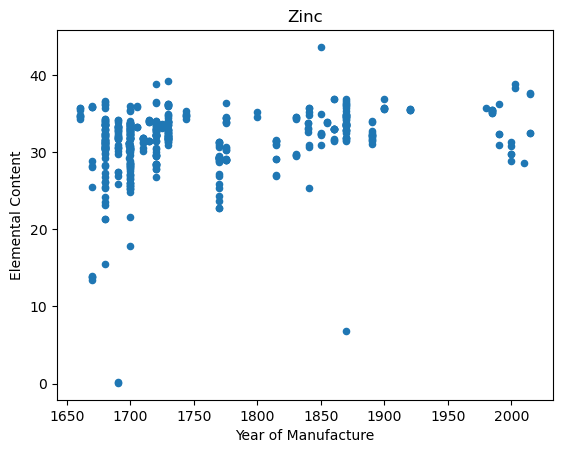

In [140]:
Zn_graph_df.plot.scatter('Year of Manufacture','Elemental Content',title='Zinc')
plt.savefig('HistoricalBrassZinc.png')

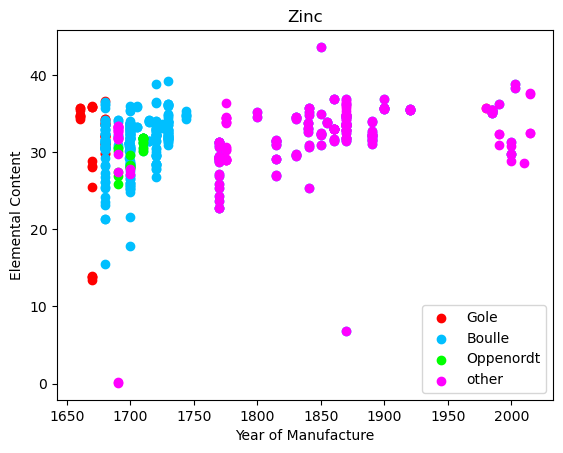

In [184]:
plt.scatter(gole_df['Mean Date'], gole_df['Zn'], color='red', label='Gole')
plt.scatter(boulle_df['Mean Date'], boulle_df['Zn'], color='deepskyblue', label='Boulle')
plt.scatter(oppenordt_df['Mean Date'], oppenordt_df['Zn'], color='lime', label='Oppenordt')
plt.scatter(other_df['Mean Date'], other_df['Zn'], color='magenta', label='other')
plt.title('Zinc')
plt.xlabel('Year of Manufacture')
plt.ylabel('Elemental Content')
plt.legend()
plt.savefig('HistoricalBrassZincArtistSeparation.png')
plt.show()

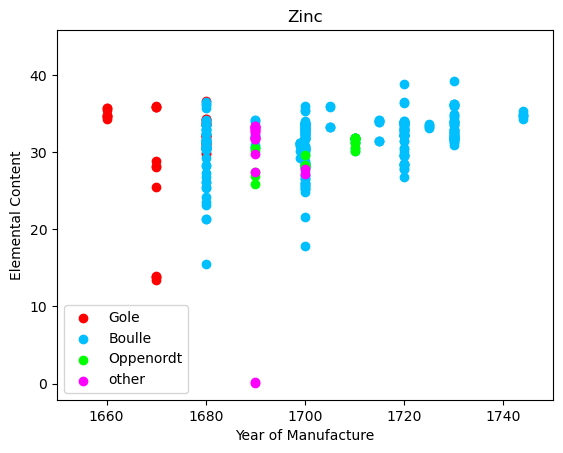

In [177]:
plt.scatter(gole_df['Mean Date'], gole_df['Zn'], color='red', label='Gole')
plt.scatter(boulle_df['Mean Date'], boulle_df['Zn'], color='deepskyblue', label='Boulle')
plt.scatter(oppenordt_df['Mean Date'], oppenordt_df['Zn'], color='lime', label='Oppenordt')
plt.scatter(other_df['Mean Date'], other_df['Zn'], color='magenta', label='other')
plt.title('Zinc')
plt.xlabel('Year of Manufacture')
plt.ylabel('Elemental Content')
plt.xlim(1650,1750)
plt.legend()
plt.savefig('HistoricalBrassZincArtistFocus.png')
plt.show()

In [142]:
Pb = []
manufactured_years_Pb = []

for index, row in df.iterrows():
        Pb.append(row['Pb'])
        manufactured_years_Pb.append(row['Mean Date'])

In [143]:
data4 = {'Elemental Content':Pb,'Year of Manufacture':manufactured_years_Pb}

In [144]:
Pb_graph_df = pd.DataFrame(data4)

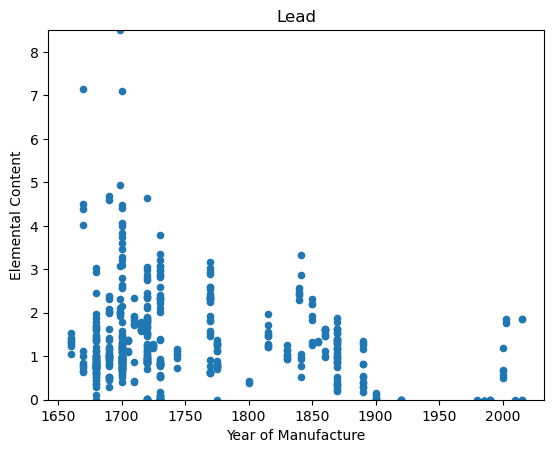

In [145]:
Pb_graph_df.plot.scatter('Year of Manufacture','Elemental Content',title='Lead',ylim=(0,8.5))
plt.savefig('HistoricalBrassLead.png')

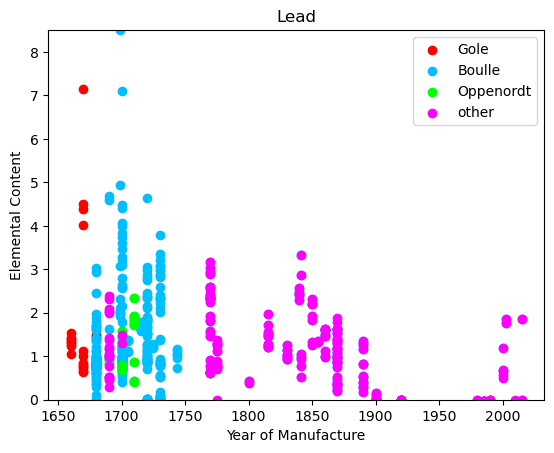

In [178]:
plt.scatter(gole_df['Mean Date'], gole_df['Pb'], color='red', label='Gole')
plt.scatter(boulle_df['Mean Date'], boulle_df['Pb'], color='deepskyblue', label='Boulle')
plt.scatter(oppenordt_df['Mean Date'], oppenordt_df['Pb'], color='lime', label='Oppenordt')
plt.scatter(other_df['Mean Date'], other_df['Pb'], color='magenta', label='other')
plt.title('Lead')
plt.xlabel('Year of Manufacture')
plt.ylabel('Elemental Content')
plt.ylim(0,8.5)
plt.legend()
plt.savefig('HistoricalBrassLeadArtistSeparation.png')
plt.show()

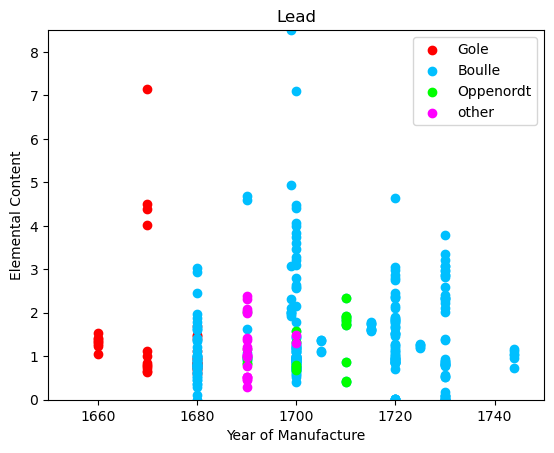

In [179]:
plt.scatter(gole_df['Mean Date'], gole_df['Pb'], color='red', label='Gole')
plt.scatter(boulle_df['Mean Date'], boulle_df['Pb'], color='deepskyblue', label='Boulle')
plt.scatter(oppenordt_df['Mean Date'], oppenordt_df['Pb'], color='lime', label='Oppenordt')
plt.scatter(other_df['Mean Date'], other_df['Pb'], color='magenta', label='other')
plt.title('Lead')
plt.xlabel('Year of Manufacture')
plt.ylabel('Elemental Content')
plt.ylim(0,8.5)
plt.xlim(1650,1750)
plt.legend()
plt.savefig('HistoricalBrassLeadArtistFocus.png')
plt.show()

In [147]:
Sn = []
manufactured_years_Sn = []

for index, row in df.iterrows():
        Sn.append(row['SnK'])
        manufactured_years_Sn.append(row['Mean Date'])

In [148]:
data5 = {'Elemental Content':Sn,'Year of Manufacture':manufactured_years_Sn}

In [149]:
Sn_graph_df = pd.DataFrame(data5)

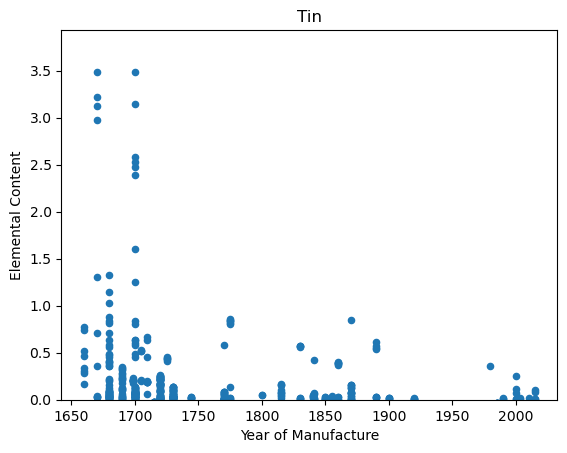

In [150]:
Sn_graph_df.plot.scatter('Year of Manufacture','Elemental Content',title='Tin',ylim=(0,3.93))
plt.savefig('HistoricalBrassTin.png')

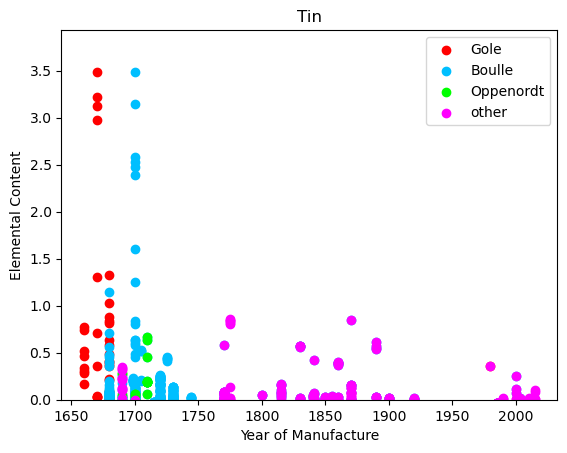

In [180]:
plt.scatter(gole_df['Mean Date'], gole_df['SnK'], color='red', label='Gole')
plt.scatter(boulle_df['Mean Date'], boulle_df['SnK'], color='deepskyblue', label='Boulle')
plt.scatter(oppenordt_df['Mean Date'], oppenordt_df['SnK'], color='lime', label='Oppenordt')
plt.scatter(other_df['Mean Date'], other_df['SnK'], color='magenta', label='other')
plt.title('Tin')
plt.xlabel('Year of Manufacture')
plt.ylabel('Elemental Content')
plt.ylim(0,3.93)
plt.legend()
plt.savefig('HistoricalBrassTinArtistSeparation.png')
plt.show()

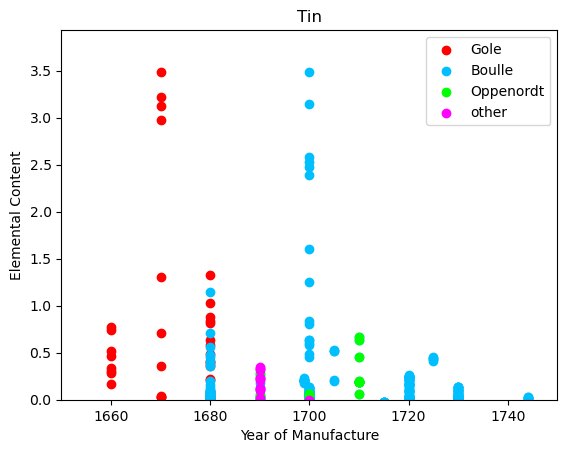

In [181]:
plt.scatter(gole_df['Mean Date'], gole_df['SnK'], color='red', label='Gole')
plt.scatter(boulle_df['Mean Date'], boulle_df['SnK'], color='deepskyblue', label='Boulle')
plt.scatter(oppenordt_df['Mean Date'], oppenordt_df['SnK'], color='lime', label='Oppenordt')
plt.scatter(other_df['Mean Date'], other_df['SnK'], color='magenta', label='other')
plt.title('Tin')
plt.xlabel('Year of Manufacture')
plt.ylabel('Elemental Content')
plt.ylim(0,3.93)
plt.xlim(1650,1750)
plt.legend()
plt.savefig('HistoricalBrassTinArtistFocus.png')
plt.show()

In [152]:
Sb = []
manufactured_years_Sb = []

for index, row in df.iterrows():
        Sb.append(row['Sb'])
        manufactured_years_Sb.append(row['Mean Date'])

In [153]:
data6 = {'Elemental Content':Sb,'Year of Manufacture':manufactured_years_Sb}

In [154]:
Sb_graph_df = pd.DataFrame(data6)

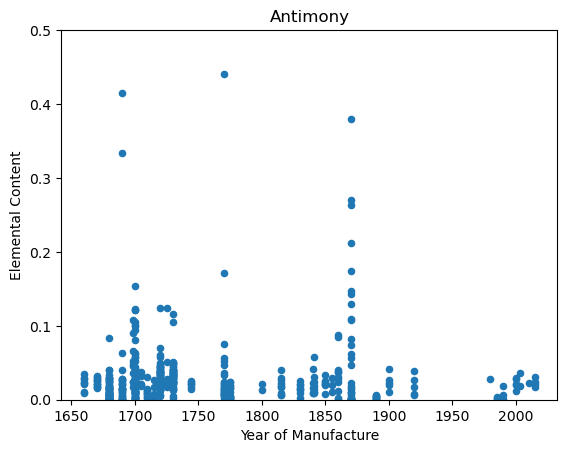

In [155]:
Sb_graph_df.plot.scatter('Year of Manufacture','Elemental Content',title='Antimony',ylim=(0,0.5))
plt.savefig('HistoricalBrassAntimony.png')

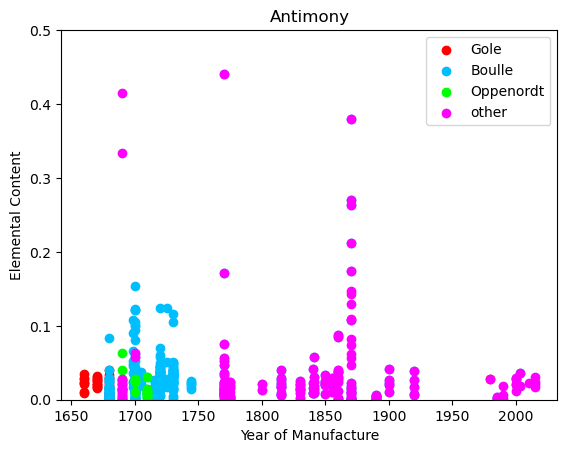

In [182]:
plt.scatter(gole_df['Mean Date'], gole_df['Sb'], color='red', label='Gole')
plt.scatter(boulle_df['Mean Date'], boulle_df['Sb'], color='deepskyblue', label='Boulle')
plt.scatter(oppenordt_df['Mean Date'], oppenordt_df['Sb'], color='lime', label='Oppenordt')
plt.scatter(other_df['Mean Date'], other_df['Sb'], color='magenta', label='other')
plt.title('Antimony')
plt.xlabel('Year of Manufacture')
plt.ylabel('Elemental Content')
plt.ylim(0,0.5)
plt.legend()
plt.savefig('HistoricalBrassAntimonyArtistSeparation.png')
plt.show()

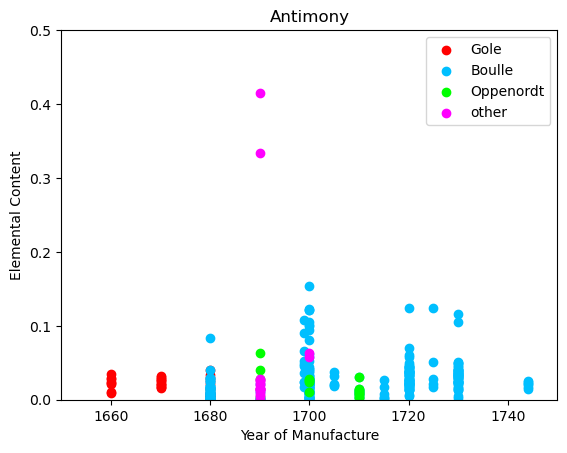

In [183]:
plt.scatter(gole_df['Mean Date'], gole_df['Sb'], color='red', label='Gole')
plt.scatter(boulle_df['Mean Date'], boulle_df['Sb'], color='deepskyblue', label='Boulle')
plt.scatter(oppenordt_df['Mean Date'], oppenordt_df['Sb'], color='lime', label='Oppenordt')
plt.scatter(other_df['Mean Date'], other_df['Sb'], color='magenta', label='other')
plt.title('Antimony')
plt.xlabel('Year of Manufacture')
plt.ylabel('Elemental Content')
plt.ylim(0,0.5)
plt.xlim(1650,1750)
plt.legend()
plt.savefig('HistoricalBrassAntimonyArtistFocus.png')
plt.show()